The famous [Monty Hall brain teaser](https://en.wikipedia.org/wiki/Monty_Hall_problem):

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

There is a really [fun discussion over at Marilyn vos Savant's site](http://marilynvossavant.com/game-show-problem/).

Ok, now to setup the problem, along with some kind of visuals and what not.

In [278]:
%matplotlib inline

# need to generate random numbers
import random
import numpy as np

# for plots, cause visuals
import matplotlib.pyplot as plt 
import seaborn as sns

# setting up a game

There are many ways to do this, but to keep it simple and human comprehensible I'm going to do it one game at a time. 

First up, a helper function which takes in the original door guessesd and the goat door opened up the host and returns the switched door:

In [279]:
def switch_door(guess, goat_door_opened):
    """takes in the guessed door and the goat door opened
    and returns the switched door number"""
    doors = [0,1,2]
    doors.remove(goat_door_opened)
    doors.remove(guess)
    return doors[0]

Now the actual monty hall function - it takes in a guess and whether you want to switch your guess, and returns True or False depending on whether you win

In [280]:
def monty_hall(guess=0, switch_guess=False, open_goat_door=True):
    """sets up 3 doors 0-2, one which has a pize, and 2 have goats.
    takes in the door number guessed by the player and whether he/she switched door
    after one goat door is revealed"""
    
    doors = [door for door in range(3)]
    np.random.shuffle(doors)
    prize_door = doors.pop()
    
    goat_door_opened = doors[0]
    
    if goat_door_opened == guess:
        goat_door_opened = doors[1]
        
    if switch_guess:
        return switch_door(guess, goat_door_opened) == prize_door
    else:
        return guess == prize_door

Now to run through a bunch of monty hall games:

In [281]:
no_switch = np.mean([monty_hall(random.randint(0,2), False) for _ in range(100000)])
no_switch

0.33223000000000003

Not switching doors wins a third of the time, which makes intuitive sense, since we are choosing one door out of three.

In [282]:
yes_switch = np.mean([monty_hall(random.randint(0,2), True) for _ in range(100000)])
yes_switch

0.66474999999999995

This is the suprising result, since switching our guess increases the win rate to two third! To put it more graphically:

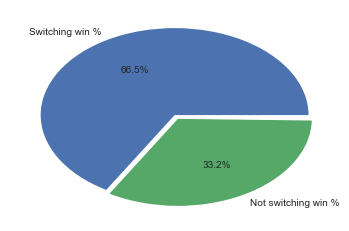

In [284]:
plt.pie([yes_switch, no_switch], labels=["Switching win %", "Not switching win %"],
       autopct='%1.1f%%', explode=(0, 0.05));

So our chances of winning essentially double if we switch our guess once a goat door has been opened.

A good [monty hall infographic](https://somethingaweek.wordpress.com/2010/08/19/22-lets-make-a-deal/):

<img src="images/monty-hall.png" width="75%">.

# So what if Monty never opens a goat door, and just gives us a change to switch the guessed door?

So first we change the switch door function:

In [213]:
def switch_door_no_revel(guess):
    """takes in the guessed door
    and returns the switched door number"""
    doors = [0,1,2]
    doors.remove(guess)
    np.random.shuffle(doors)
    return doors[0]

Then I removed the revealing the goat door code:

In [290]:
def monty_hall_no_reveal(guess=0, switch_guess=False):
    """sets up 3 doors 0-2, one which has a pize, and 2 have goats.
    takes in the door number guessed by the player and whether he/she switched door
    """
    
    doors = [door for door in range(3)]
    np.random.shuffle(doors)
    prize_door = doors.pop()
        
    if switch_guess:
        return switch_door_no_revel(guess) == prize_door
    else:
        return guess == prize_door

In [291]:
no_switch_no_reveal = np.mean([monty_hall_no_reveal(random.randint(0,2), False) for _ in range(100000)])
yes_switch_no_reveal = np.mean([monty_hall_no_reveal(random.randint(0,2), True) for _ in range(100000)])

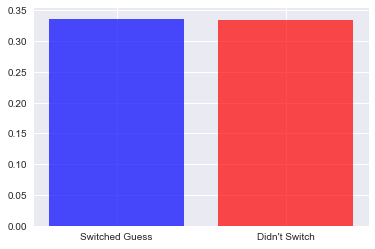

In [292]:
plt.bar([0,1], [yes_switch_no_reveal, no_switch_no_reveal], tick_label=["Switched Guess","Didn't Switch"], 
        color=["blue","red"], alpha=0.7);

There is no impact of switching our guess if a goat door hasn't been revealed.